In [37]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df=pd.read_csv('finalloan2.csv')
print(df.head())

  Customer ID               Name Gender  Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F   56   1933.050000              Low   
1     C-33999  America Calderone      M   32   4952.910000              Low   
2      C-3770      Rosetta Verne      F   65    988.190000             High   
3     C-26480         Zoe Chitty      F   65   2630.574417             High   
4     C-23459       Afton Venema      F   31   2614.770000              Low   

  Profession     Type of Employment    Location  Loan Amount Request (USD)  \
0    Working            Sales staff  Semi-Urban                   72809.58   
1    Working               Laborers  Semi-Urban                   46837.47   
2  Pensioner               Laborers  Semi-Urban                   45593.04   
3  Pensioner               Laborers       Rural                   80057.92   
4    Working  High skill tech staff  Semi-Urban                  113858.89   

   ...  Credit Score No. of Defaults Has Active Credit C

In [39]:
df.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,3.000000e+04,30000.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.232000,739.885381,0.193933,501.934700,2.465785e+03,2.460067,-4.743867,1.317597e+05,44940.953321
std,16.045129,1.036820e+04,59536.949605,241.849055,0.913457,70.085602,0.395384,288.158086,1.037391e+04,1.118562,74.614593,9.354955e+04,43065.479471
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.743305e+03,41177.755000,248.655000,2.000000,685.415000,0.000000,251.000000,1.608430e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.473470e+03,75128.075000,376.505000,2.000000,739.885381,0.000000,504.000000,1.988570e+03,2.000000,1.000000,1.099936e+05,36068.665000
75%,55.000000,2.869142e+03,119964.605000,520.102500,3.000000,795.140000,0.000000,751.000000,2.849573e+03,3.000000,1.000000,1.788807e+05,70821.752500
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,184091.050000


## Feature Engineering

In [40]:
# Adding a column for Loan to Property Value
df['Loan_Property_ratio']=df['Loan Sanction Amount (USD)']/df['Property Price']
print(df['Loan_Property_ratio'],df['Loan Sanction Amount (USD)'],df['Property Price'])

0        0.455312
1        0.683871
2        0.503508
3        0.461461
4        0.354840
           ...   
29995    0.621010
29996    0.634637
29997    0.597970
29998    0.593164
29999    0.602624
Name: Loan_Property_ratio, Length: 30000, dtype: float64 0         54607.18
1         37469.98
2         36474.43
3         56040.54
4         74008.28
           ...    
29995     68992.11
29996     46616.60
29997     61057.56
29998     99766.87
29999    117217.90
Name: Loan Sanction Amount (USD), Length: 30000, dtype: float64 0        119933.46
1         54791.00
2         72440.58
3        121441.51
4        208567.91
           ...    
29995    111096.56
29996     73453.94
29997    102108.02
29998    168194.47
29999    194512.60
Name: Property Price, Length: 30000, dtype: float64


In [41]:
df['Loan_Categories']=pd.qcut(df['Loan Sanction Amount (USD)'],q=4,labels=['Low','Medium','High','VeryHigh'])
df['Price_Category']=pd.qcut(df['Property Price'],q=4,labels=['Affordable', 'Mid-range', 'High-end', 'Luxury'])
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD),Loan_Property_ratio,Loan_Categories,Price_Category
0,C-36995,Frederica Shealy,F,56,1933.050000,Low,Working,Sales staff,Semi-Urban,72809.58,...,746,1933.05,4,Rural,1,119933.46,54607.18,0.455312,High,High-end
1,C-33999,America Calderone,M,32,4952.910000,Low,Working,Laborers,Semi-Urban,46837.47,...,608,4952.91,2,Rural,1,54791.00,37469.98,0.683871,High,Affordable
2,C-3770,Rosetta Verne,F,65,988.190000,High,Pensioner,Laborers,Semi-Urban,45593.04,...,546,988.19,2,Urban,0,72440.58,36474.43,0.503508,High,Mid-range
3,C-26480,Zoe Chitty,F,65,2630.574417,High,Pensioner,Laborers,Rural,80057.92,...,890,1608.43,2,Semi-Urban,1,121441.51,56040.54,0.461461,High,High-end
4,C-23459,Afton Venema,F,31,2614.770000,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,715,2614.77,4,Semi-Urban,1,208567.91,74008.28,0.354840,VeryHigh,Luxury


In [70]:
df['Loan Sanction Status'] = df['Loan Sanction Amount (USD)'].apply(lambda x: 'no' if x <=0 else 'yes')

## Univariate Analysis

In [71]:
df['Loan Sanction Amount (USD)'].describe()

count     30000.000000
mean      44940.953321
std       43065.479471
min        -999.000000
25%           0.000000
50%       36068.665000
75%       70821.752500
max      184091.050000
Name: Loan Sanction Amount (USD), dtype: float64

In [72]:
df['Property Price'].describe()

count    3.000000e+04
mean     1.317597e+05
std      9.354955e+04
min     -9.990000e+02
25%      6.057216e+04
50%      1.099936e+05
75%      1.788807e+05
max      1.077967e+06
Name: Property Price, dtype: float64

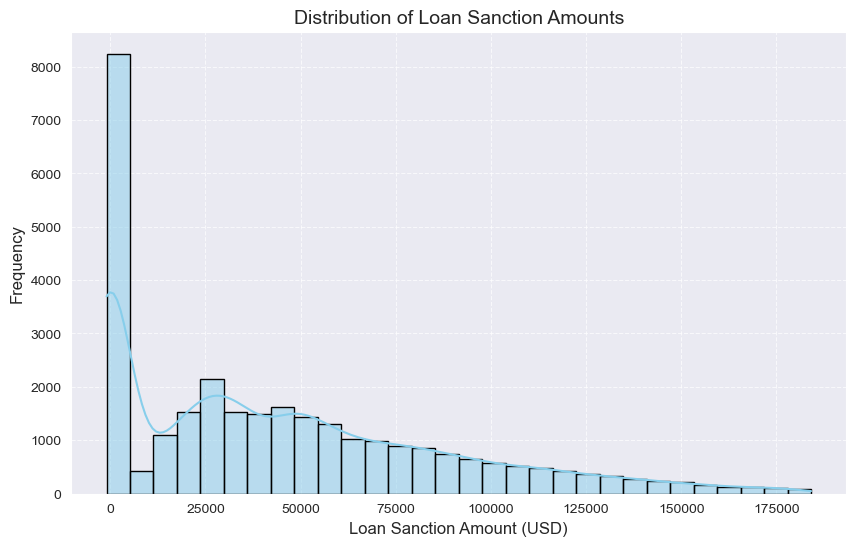

In [73]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Loan Sanction Amount (USD)'], kde=True, color='skyblue', bins=30, edgecolor='black')
plt.xlabel('Loan Sanction Amount (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Loan Sanction Amounts', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

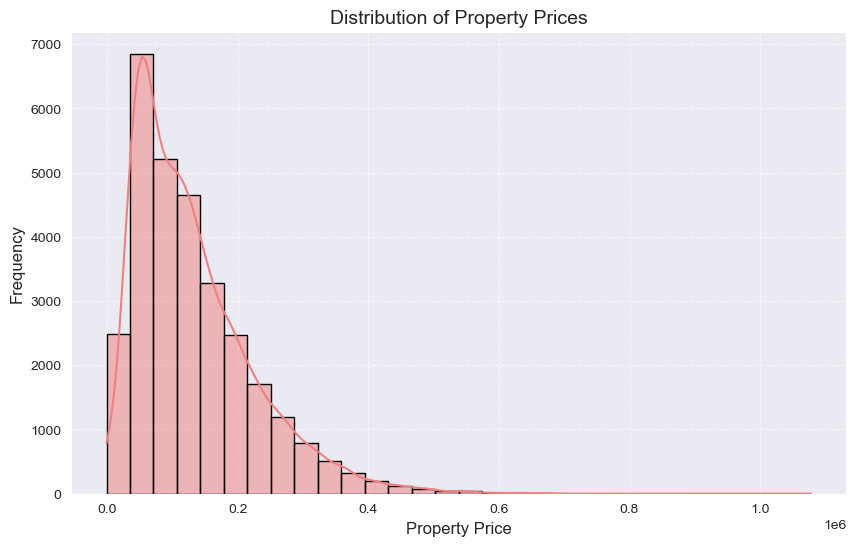

In [74]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Property Price'], kde=True, color='lightcoral', bins=30, edgecolor='black')
plt.xlabel('Property Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Property Prices', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

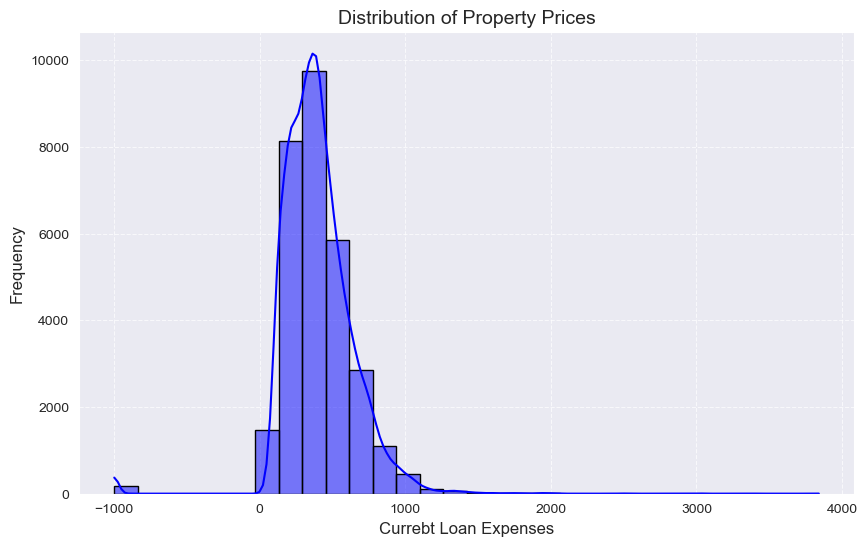

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Current Loan Expenses (USD)'], kde=True, color='blue', bins=30, edgecolor='black')
plt.xlabel('Currebt Loan Expenses', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Property Prices', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

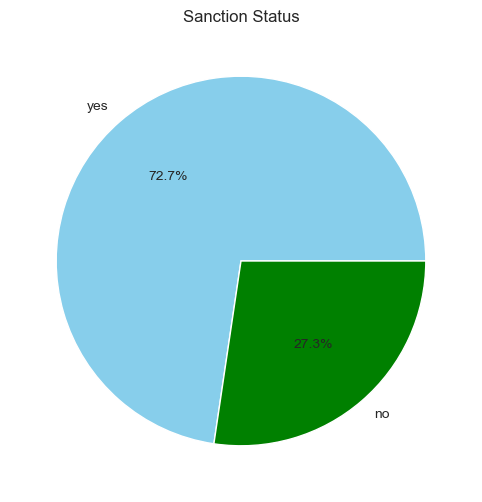

In [76]:
plt.figure(figsize=(8, 6))
df['Loan Sanction Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'green'])
plt.title('Sanction Status')
plt.ylabel('')
plt.show()

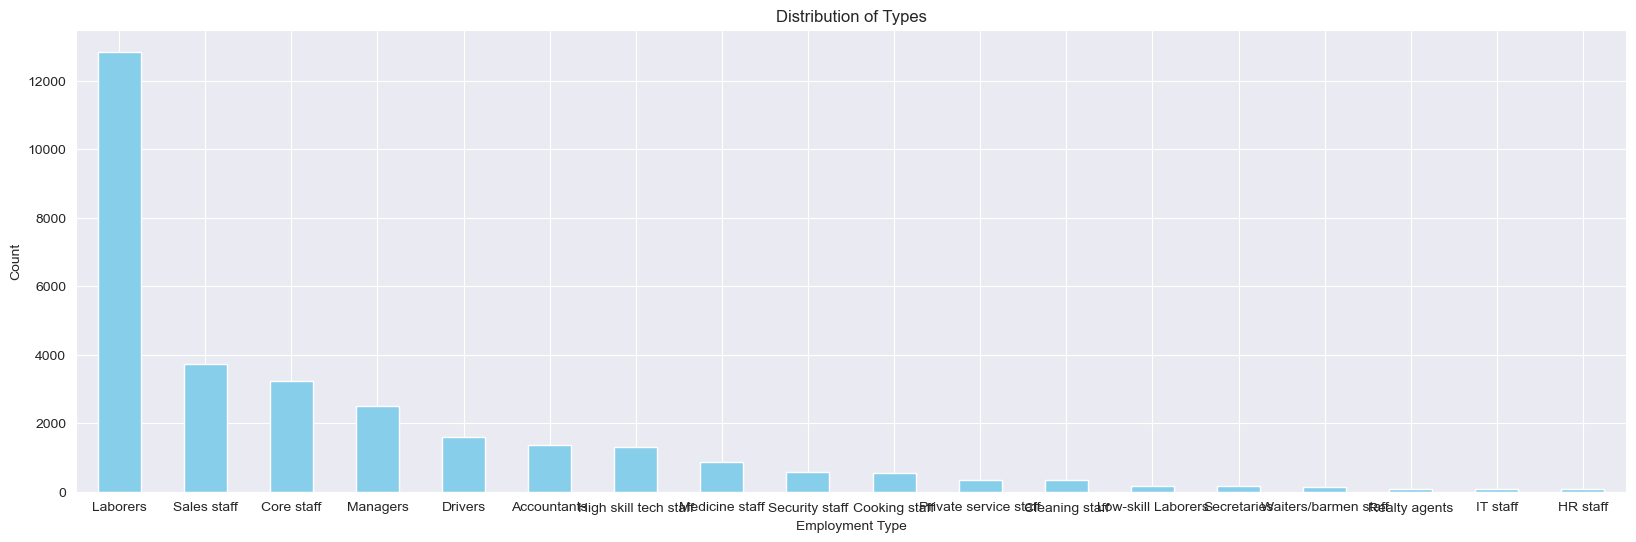

In [78]:
plt.figure(figsize=(20, 6))
df['Type of Employment'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.title('Distribution of Types')
plt.xticks(rotation=0)
plt.show()

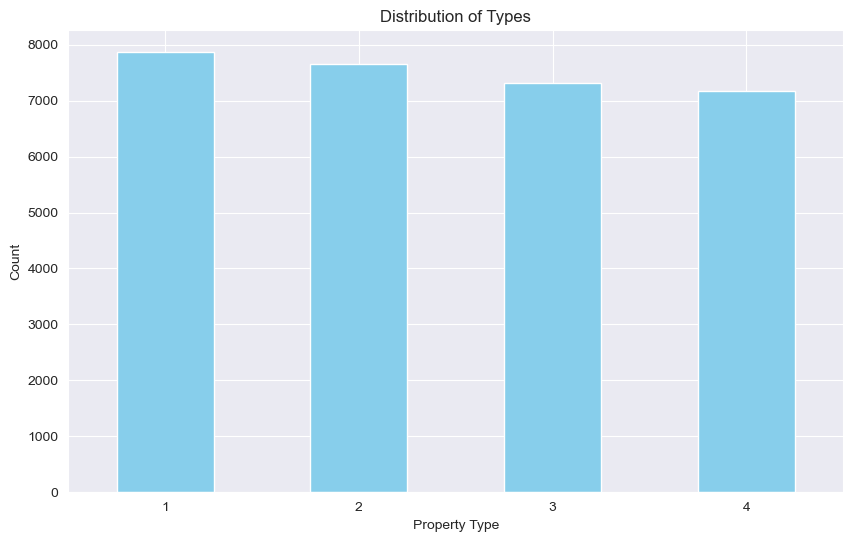

In [79]:
plt.figure(figsize=(10, 6))
df['Property Type'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Distribution of Types')
plt.xticks(rotation=0)
plt.show()

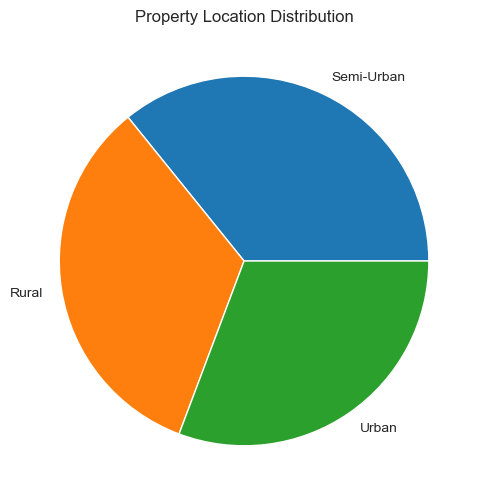

In [80]:
plt.figure(figsize=(8, 6))
df['Property Location'].value_counts().plot(kind='pie')
plt.title('Property Location Distribution')
plt.ylabel('')
plt.show()

## Bivariate Analysis


<Figure size 1000x600 with 0 Axes>

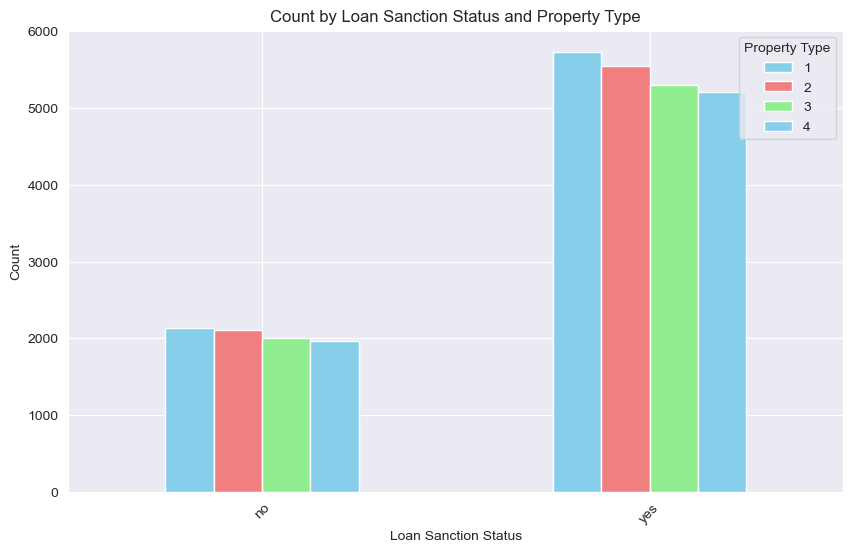

In [81]:
status_property_count = df.groupby(['Loan Sanction Status', 'Property Type']).size().unstack()
plt.figure(figsize=(10, 6))
status_property_count.plot(kind='bar', stacked=False, color=['skyblue', 'lightcoral', 'lightgreen'], figsize=(10, 6))
plt.title('Count by Loan Sanction Status and Property Type')
plt.xlabel('Loan Sanction Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Property Type', loc='upper right')
plt.show()

<Figure size 1200x800 with 0 Axes>

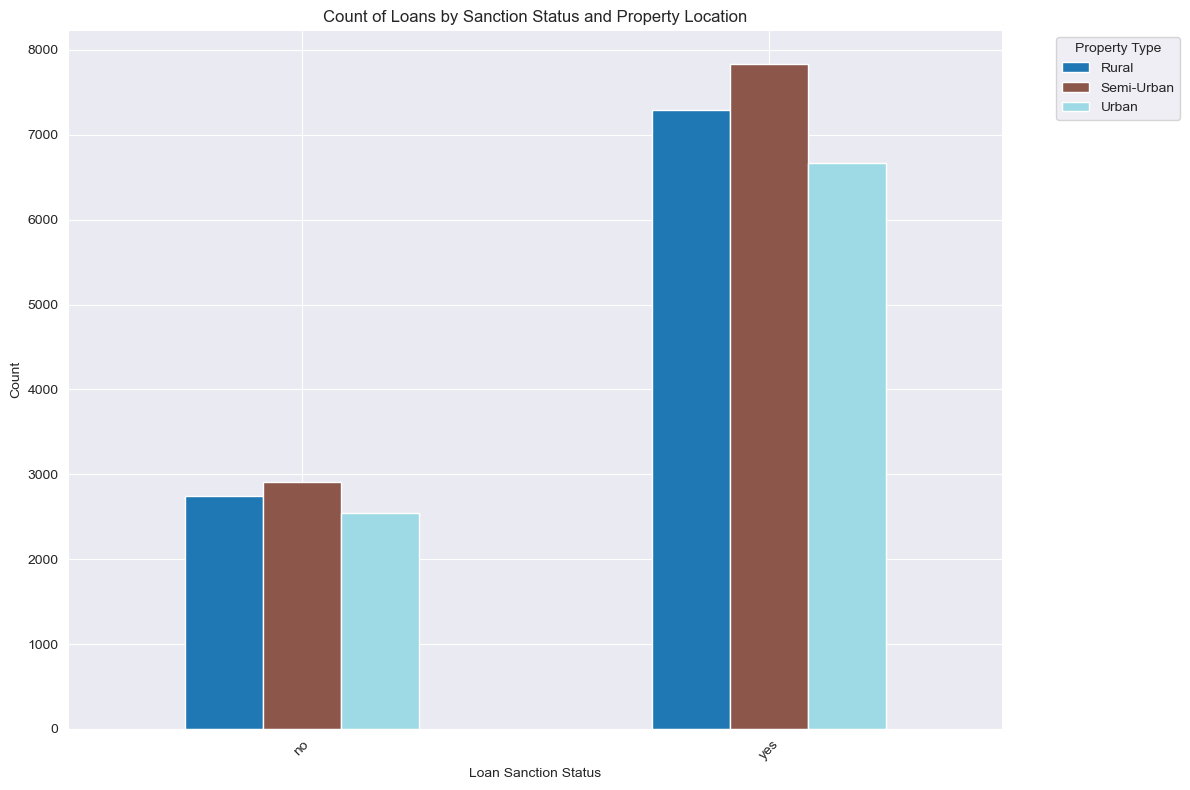

In [82]:
status_property_count = df.groupby(['Loan Sanction Status', 'Property Location']).size().unstack()
plt.figure(figsize=(12, 8))
status_property_count.plot(kind='bar', stacked=False, colormap='tab20', figsize=(12, 8))
plt.title('Count of Loans by Sanction Status and Property Location')
plt.xlabel('Loan Sanction Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  
plt.show()

<Figure size 1200x800 with 0 Axes>

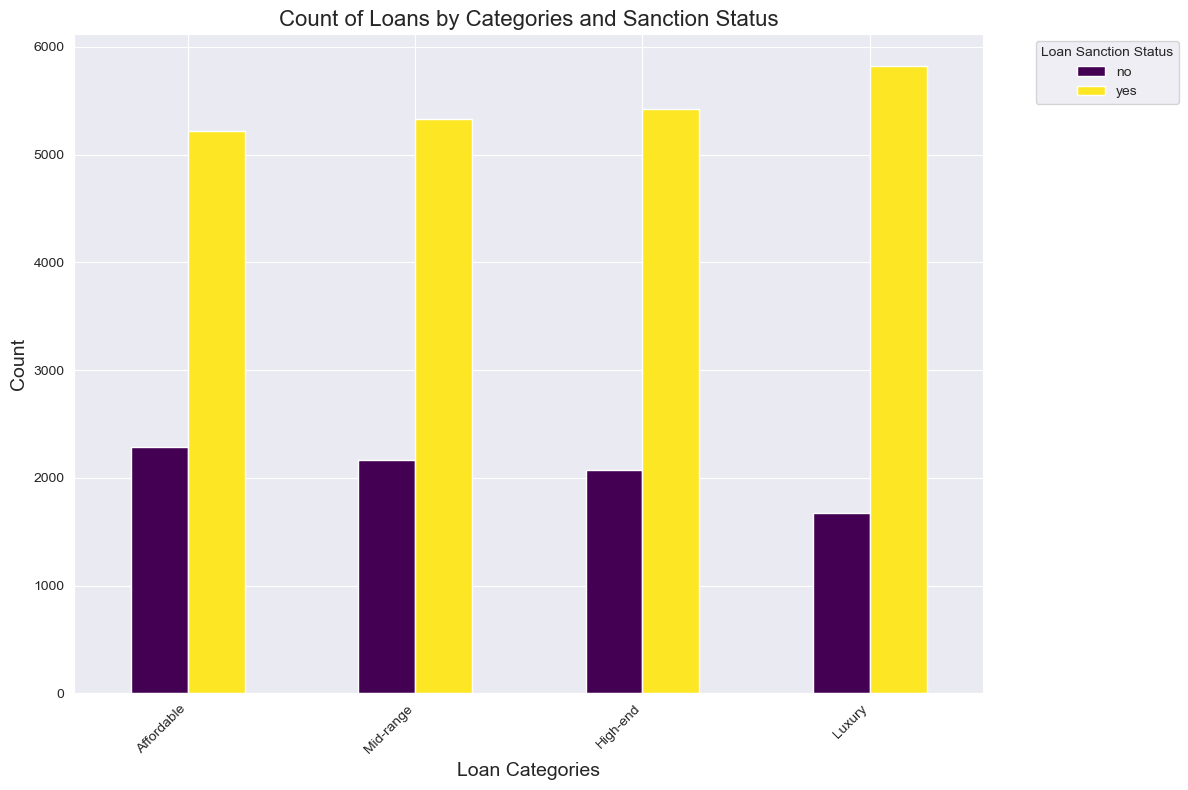

In [85]:
loan_status_category_count = df.groupby(['Price_Category', 'Loan Sanction Status']).size().unstack()
plt.figure(figsize=(12, 8))
loan_status_category_count.plot(kind='bar', stacked=False, colormap='viridis', figsize=(12, 8))
plt.title('Count of Loans by Categories and Sanction Status', fontsize=16)
plt.xlabel('Loan Categories', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Sanction Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  
plt.show()

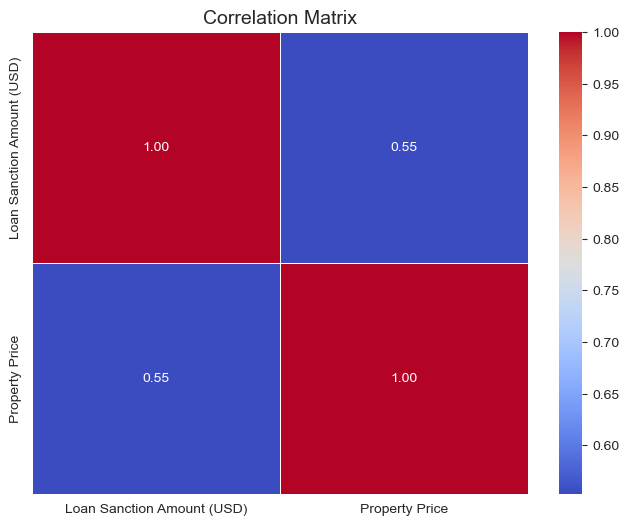

In [83]:
correlation_matrix=df[['Loan Sanction Amount (USD)', 'Property Price']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix', fontsize=14)
plt.show()


<Axes: xlabel='Loan Sanction Amount (USD)', ylabel='Property Price'>

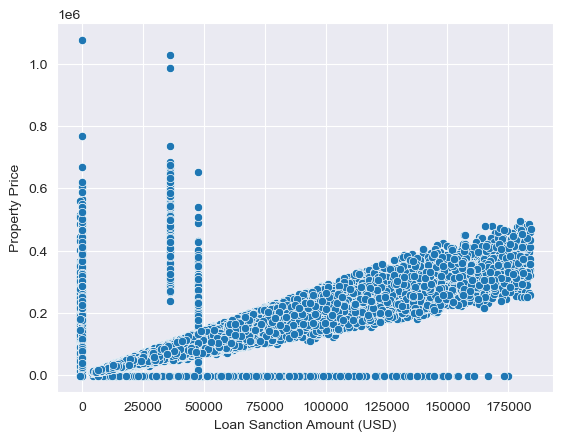

In [61]:
sns.scatterplot(x='Loan Sanction Amount (USD)', y='Property Price', data=df)


## Multivariate Analysis

In [86]:
data = {
    'Customer ID': ['C-36995'],
    'Name': ['Frederica Shealy'],
    'Gender': ['F'],
    'Age': [56],
    'Income (USD)': [1933.05],
    'Income Stability': ['Low'],
    'Profession': ['Working'],
    'Type of Employment': ['Sales staff'],
    'Location': ['Semi-Urban'],
    'Loan Amount Request (USD)': [72809.58],
    'Current Loan Expenses (USD)': [241.08],
    'Expense Type 1': ['N'],
    'Expense Type 2': ['N'],
    'Dependents': [3],
    'Credit Score': [809.44],
    'No. of Defaults': [0],
    'Has Active Credit Card': [''],
    'Property ID': [746],
    'Property Age': ['16 April 1905'],
    'Property Type': [4],
    'Property Location': ['Rural'],
    'Co-Applicant': [1],
    'Property Price': [119933.46],
    'Loan Sanction Amount (USD)': [54607.18]
}

numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("\nCategorical Columns:")
print(categorical_columns)


Categorical Columns:
['Customer ID', 'Name', 'Gender', 'Income Stability', 'Profession', 'Type of Employment', 'Location', 'Expense Type 1', 'Expense Type 2', 'Has Active Credit Card', 'Property Location', 'Loan_Categories', 'Price_Category', 'Loan Sanction Status']


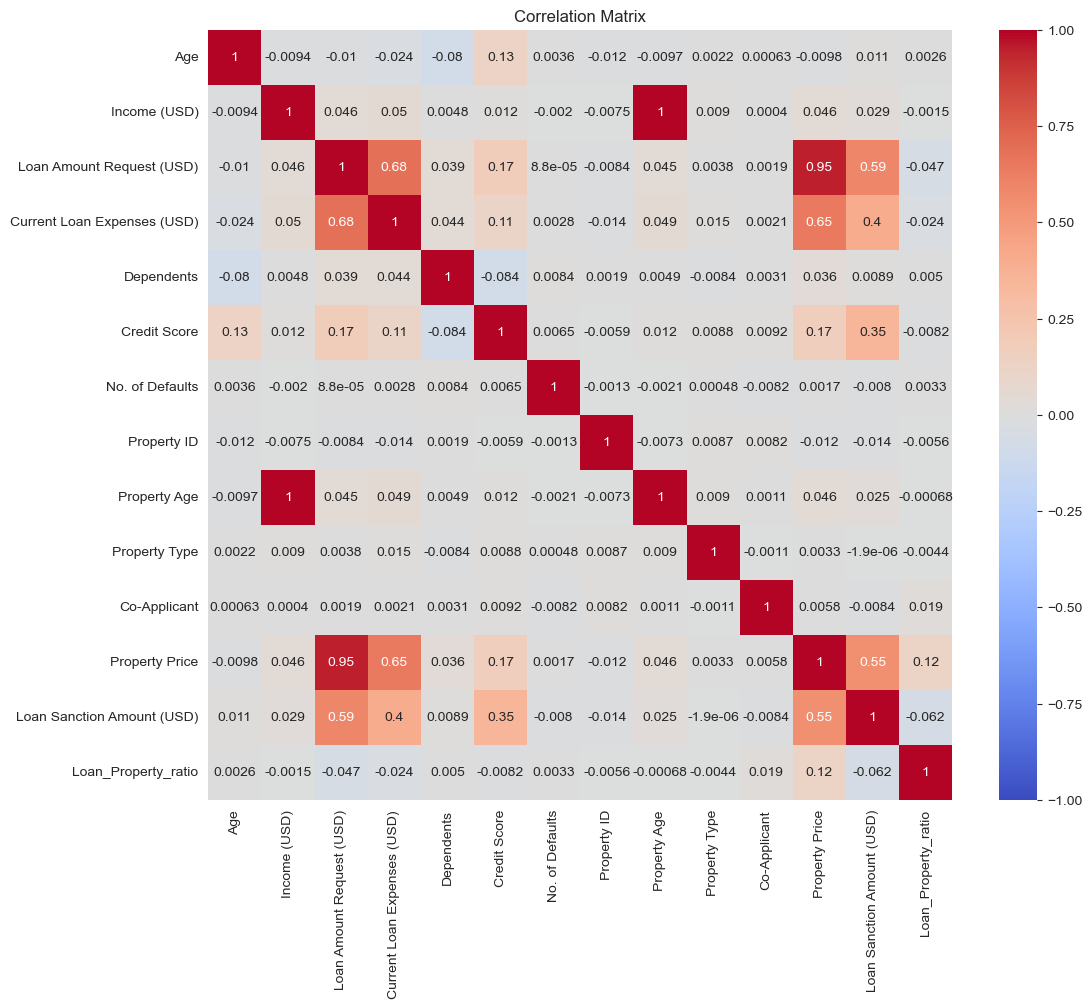

In [87]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()